# Matplotlibの基本

このノートブックでは、Matplotlib（Pythonの可視化ライブラリ）の基本操作について学びます。
Matplotlibはデータの可視化やグラフ作成において最も重要なライブラリの一つです。

## 目次
1. [Matplotlibとは](#matplotlibとは)
2. [基本的なプロット](#基本的なプロット)
3. [線グラフの作成](#線グラフの作成)
4. [散布図の作成](#散布図の作成)
5. [棒グラフの作成](#棒グラフの作成)
6. [ヒストグラムの作成](#ヒストグラムの作成)
7. [図のカスタマイズ](#図のカスタマイズ)
8. [複数のサブプロット](#複数のサブプロット)
9. [軸の設定とラベル](#軸の設定とラベル)
10. [凡例の追加](#凡例の追加)
11. [図の保存](#図の保存)
12. [実践的な例](#実践的な例)


---

## 必要なライブラリのインポート


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 日本語フォントの設定
try:
    jp_fonts = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Yu Gothic',
                'Noto Sans CJK JP', 'AppleGothic', 'Arial Unicode MS']
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    font_found = False
    for font_name in jp_fonts:
        if font_name in available_fonts:
            plt.rcParams['font.family'] = font_name
            font_found = True
            print(f"使用フォント: {font_name}")
            break

    if not font_found:
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN',
                                            'Yu Gothic', 'Meiryo', 'MS Gothic', 'DejaVu Sans']
        print("フォールバックフォント設定を使用")
except Exception as e:
    print(f"フォント設定の警告: {e}")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6)

# バージョン確認
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")


使用フォント: Hiragino Sans
NumPy version: 1.26.4
Matplotlib version: 3.10.1


---

## Matplotlibとは

Matplotlibは、Pythonでデータを可視化するための最も人気のあるライブラリです。

### 主な特徴

- **多様なグラフタイプ**: 線グラフ、散布図、棒グラフ、ヒストグラム、3Dプロットなど
- **高度なカスタマイズ**: 色、線のスタイル、マーカー、軸の設定など細かく制御可能
- **出版品質の図**: 高品質な図を生成し、論文やプレゼンテーションに使用可能
- **NumPyとの統合**: NumPy配列と直接連携して動作

### なぜMatplotlibが重要なのか？

- データサイエンスで必須の可視化ツール
- 機械学習の結果を可視化する際に必要
- データの理解と分析に不可欠
- 他の可視化ライブラリ（seaborn、plotly）の基盤


---

## 基本的なプロット

Matplotlibでグラフを作成する基本的な流れは以下の通りです：

1. データを準備する
2. `plt.plot()` や `plt.scatter()` などでプロットを作成
3. `plt.xlabel()`, `plt.ylabel()`, `plt.title()` でラベルを追加
4. `plt.show()` で図を表示

まずは最もシンプルな例から始めましょう。


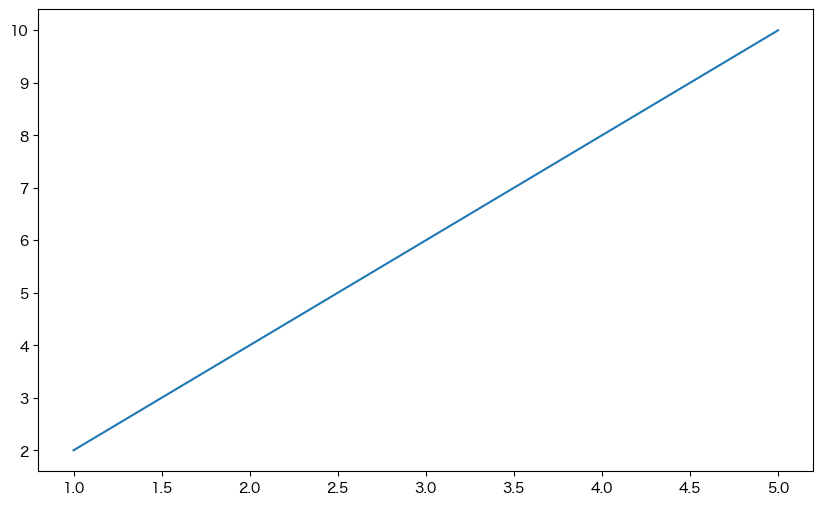

In [42]:
# 最もシンプルなプロット
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.show()


---

## 線グラフの作成

線グラフは、連続的なデータの変化を表現するのに適しています。


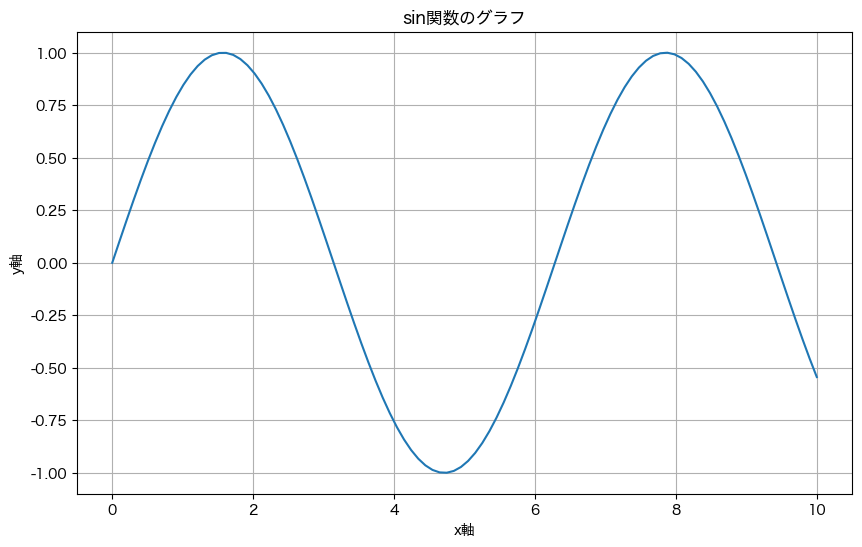

In [43]:
# NumPyを使ってデータを生成
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('sin関数のグラフ')
plt.grid(True)  # グリッドを表示
plt.show()


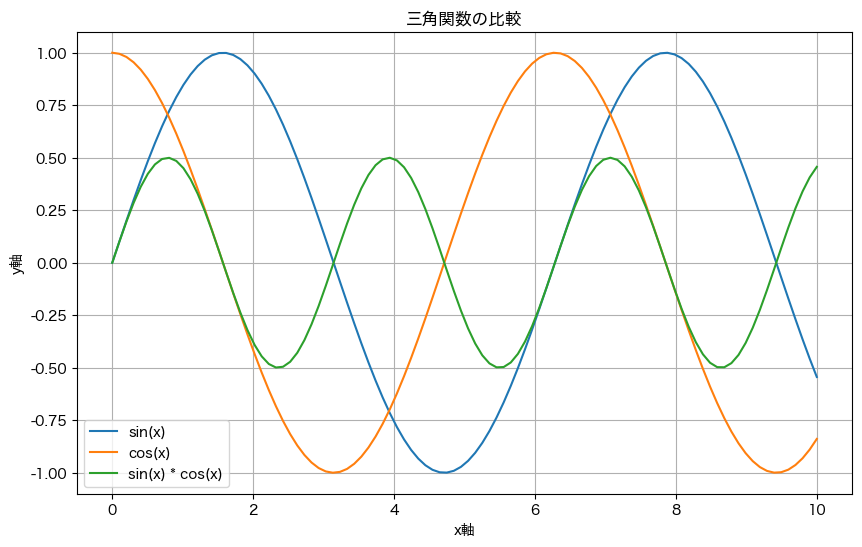

In [44]:
# 複数の線を同じ図にプロット
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)

plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.plot(x, y3, label='sin(x) * cos(x)')
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('三角関数の比較')
plt.legend()  # 凡例を表示
plt.grid(True)
plt.show()


---

## 散布図の作成

散布図は、2つの変数間の関係を視覚化するのに適しています。


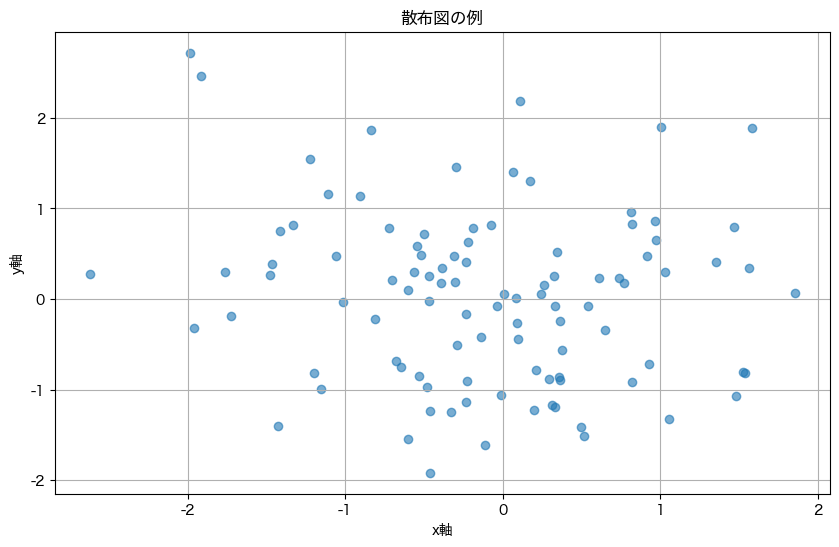

In [45]:
# ランダムなデータで散布図を作成
np.random.seed(42)
x = np.random.randn(100)
y = np.random.randn(100)

plt.scatter(x, y, alpha=0.6)  # alphaは透明度
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('散布図の例')
plt.grid(True)
plt.show()


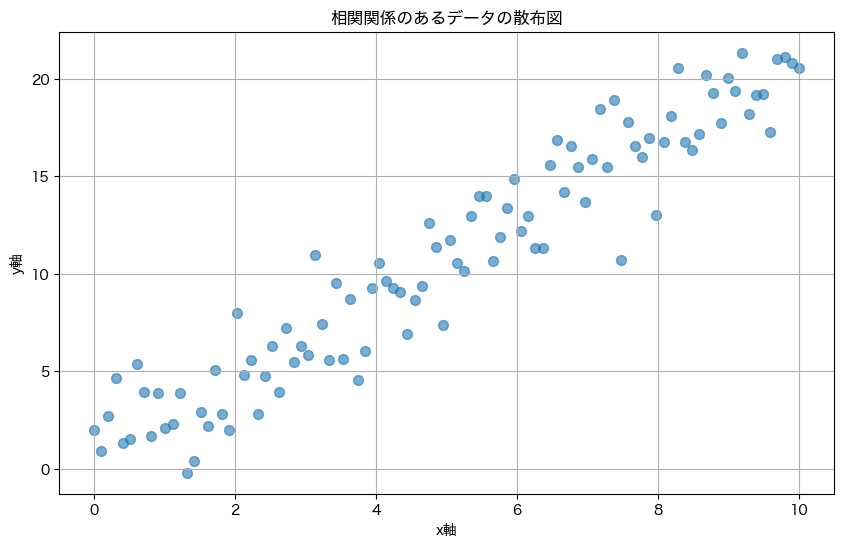

In [46]:
# 相関関係のあるデータで散布図を作成
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.randn(100) * 2  # 線形関係 + ノイズ

plt.scatter(x, y, alpha=0.6, s=50)  # sはマーカーのサイズ
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('相関関係のあるデータの散布図')
plt.grid(True)
plt.show()


---

## 棒グラフの作成

棒グラフは、カテゴリ別のデータを比較するのに適しています。


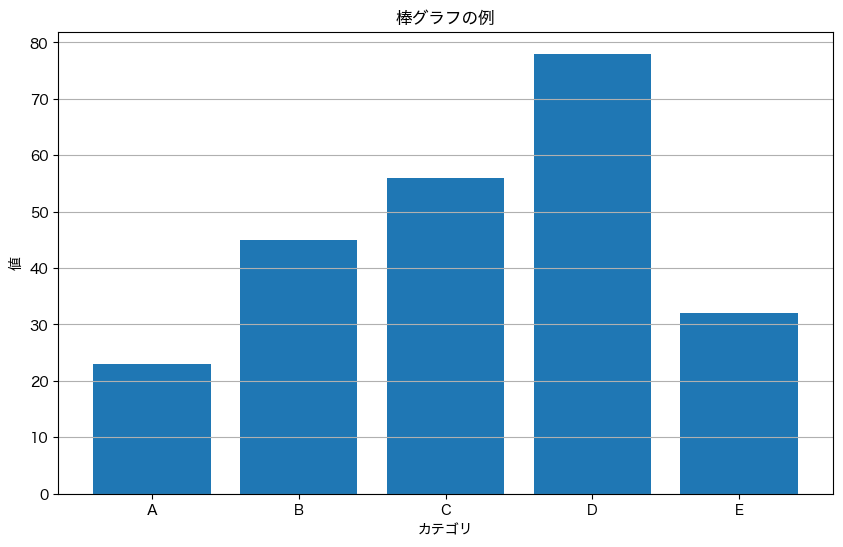

In [47]:
# 基本的な棒グラフ
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 32]

plt.bar(categories, values)
plt.xlabel('カテゴリ')
plt.ylabel('値')
plt.title('棒グラフの例')
plt.grid(True, axis='y')  # y軸のみグリッド
plt.show()


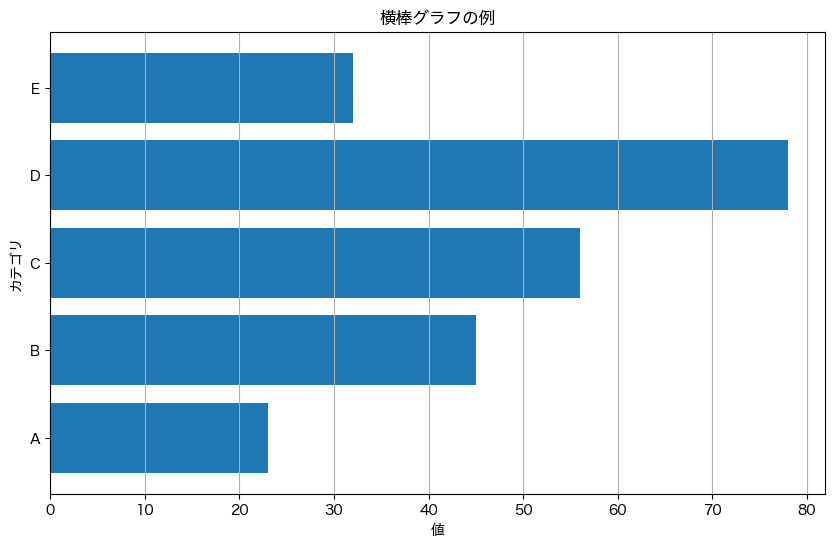

In [48]:
# 横棒グラフ
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 32]

plt.barh(categories, values)  # barhは横棒グラフ
plt.xlabel('値')
plt.ylabel('カテゴリ')
plt.title('横棒グラフの例')
plt.grid(True, axis='x')
plt.show()


---

## ヒストグラムの作成

ヒストグラムは、データの分布を視覚化するのに適しています。


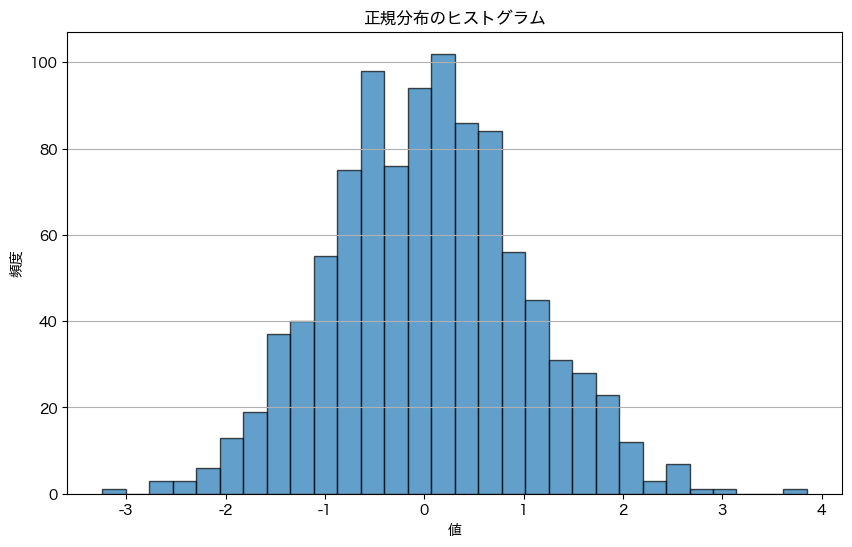

In [49]:
# 正規分布のヒストグラム
np.random.seed(42)
data = np.random.normal(0, 1, 1000)  # 平均0、標準偏差1の正規分布

plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('値')
plt.ylabel('頻度')
plt.title('正規分布のヒストグラム')
plt.grid(True, axis='y')
plt.show()


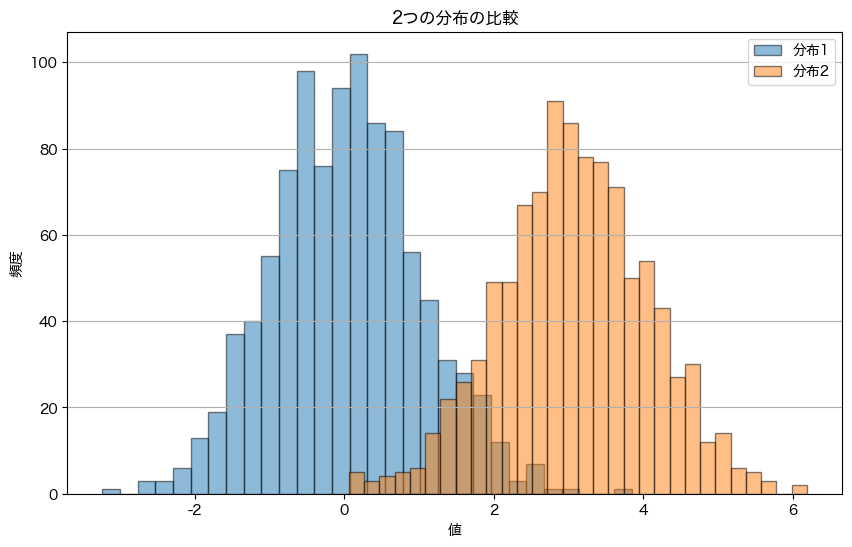

In [50]:
# 複数の分布を比較
np.random.seed(42)
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(3, 1, 1000)

plt.hist(data1, bins=30, alpha=0.5, label='分布1', edgecolor='black')
plt.hist(data2, bins=30, alpha=0.5, label='分布2', edgecolor='black')
plt.xlabel('値')
plt.ylabel('頻度')
plt.title('2つの分布の比較')
plt.legend()
plt.grid(True, axis='y')
plt.show()


---

## 図のカスタマイズ

Matplotlibでは、色、線のスタイル、マーカーなどを細かくカスタマイズできます。


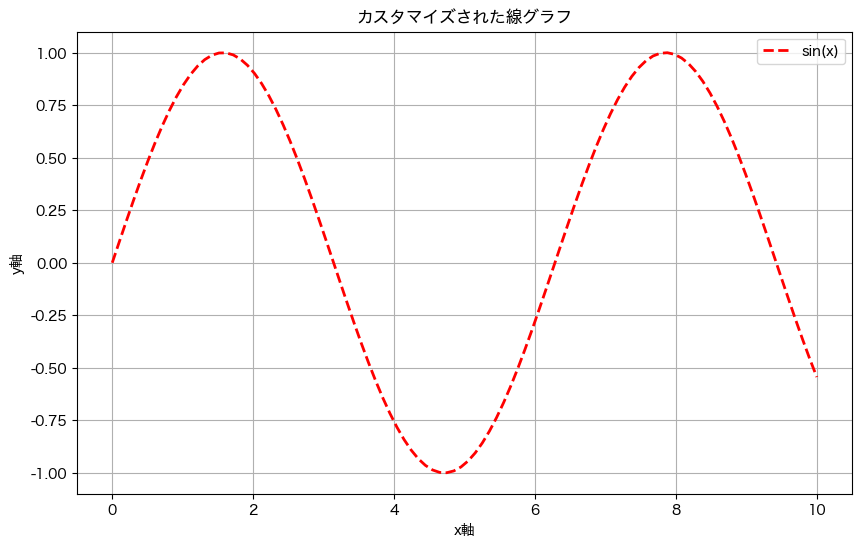

In [51]:
# 色と線のスタイルのカスタマイズ
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, color='red', linestyle='--', linewidth=2, label='sin(x)')
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('カスタマイズされた線グラフ')
plt.legend()
plt.grid(True)
plt.show()


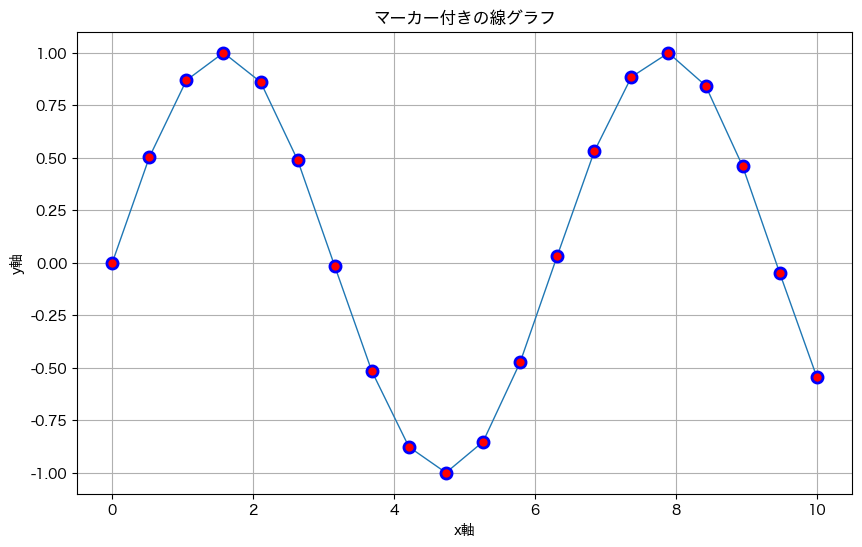

In [52]:
# マーカーのカスタマイズ
x = np.linspace(0, 10, 20)
y = np.sin(x)

plt.plot(x, y, marker='o', markersize=8, markerfacecolor='red',
         markeredgecolor='blue', markeredgewidth=2, linestyle='-', linewidth=1)
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('マーカー付きの線グラフ')
plt.grid(True)
plt.show()


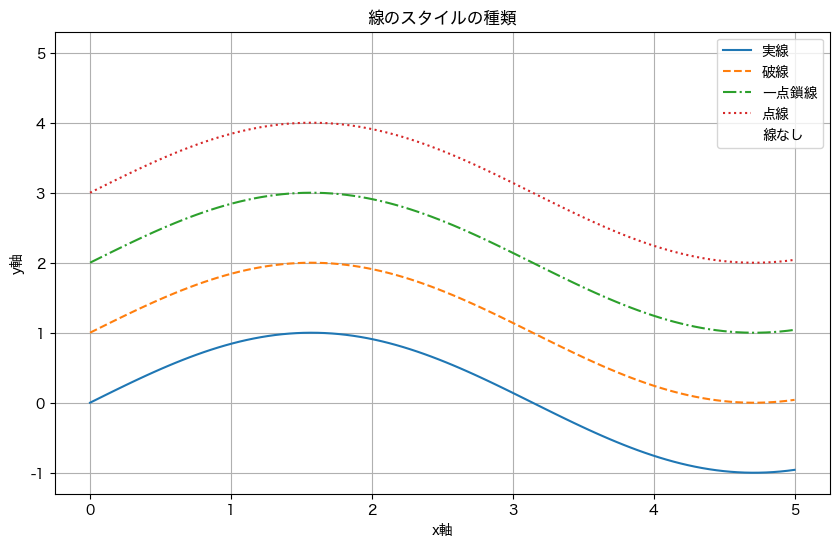

In [53]:
# 線のスタイルの種類
x = np.linspace(0, 5, 100)
styles = ['-', '--', '-.', ':', 'None']
labels = ['実線', '破線', '一点鎖線', '点線', '線なし']

for style, label in zip(styles, labels):
    plt.plot(x, np.sin(x) + styles.index(style), linestyle=style, label=label)

plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('線のスタイルの種類')
plt.legend()
plt.grid(True)
plt.show()


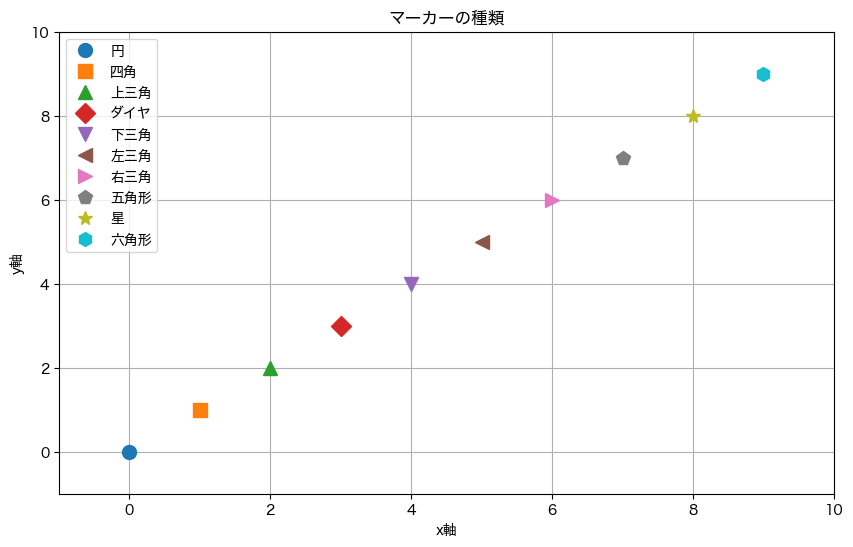

In [54]:
# マーカーの種類
x = np.arange(0, 10, 1)
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
labels = ['円', '四角', '上三角', 'ダイヤ', '下三角', '左三角', '右三角', '五角形', '星', '六角形']

for i, (marker, label) in enumerate(zip(markers, labels)):
    plt.plot(x[i], i, marker=marker, markersize=10, label=label, linestyle='None')

plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('マーカーの種類')
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.grid(True)
plt.show()


---

## 複数のサブプロット

1つの図に複数のグラフを配置することができます。


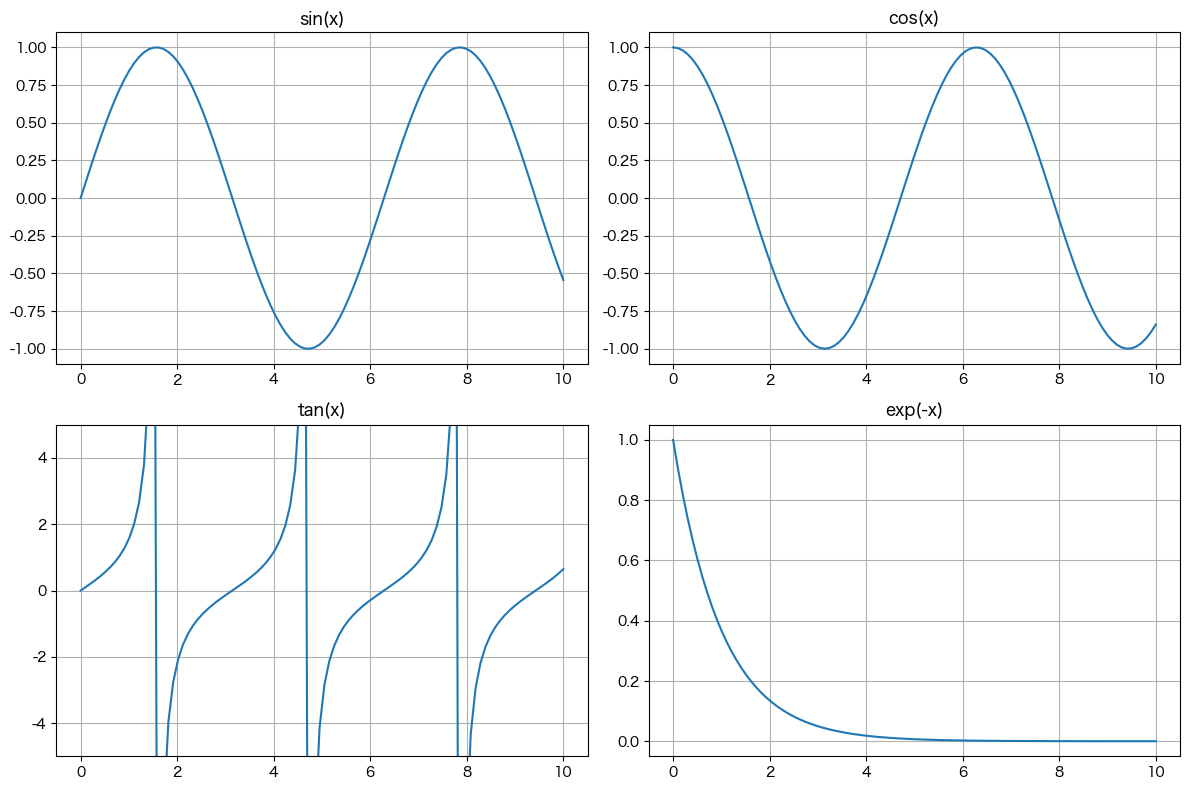

In [55]:
# subplotを使用した複数のグラフ
x = np.linspace(0, 10, 100)

# 2行2列のサブプロット
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)  # 2行2列の1番目
plt.plot(x, np.sin(x))
plt.title('sin(x)')
plt.grid(True)

plt.subplot(2, 2, 2)  # 2行2列の2番目
plt.plot(x, np.cos(x))
plt.title('cos(x)')
plt.grid(True)

plt.subplot(2, 2, 3)  # 2行2列の3番目
plt.plot(x, np.tan(x))
plt.title('tan(x)')
plt.grid(True)
plt.ylim(-5, 5)

plt.subplot(2, 2, 4)  # 2行2列の4番目
plt.plot(x, np.exp(-x))
plt.title('exp(-x)')
plt.grid(True)

plt.tight_layout()  # レイアウトを自動調整
plt.show()


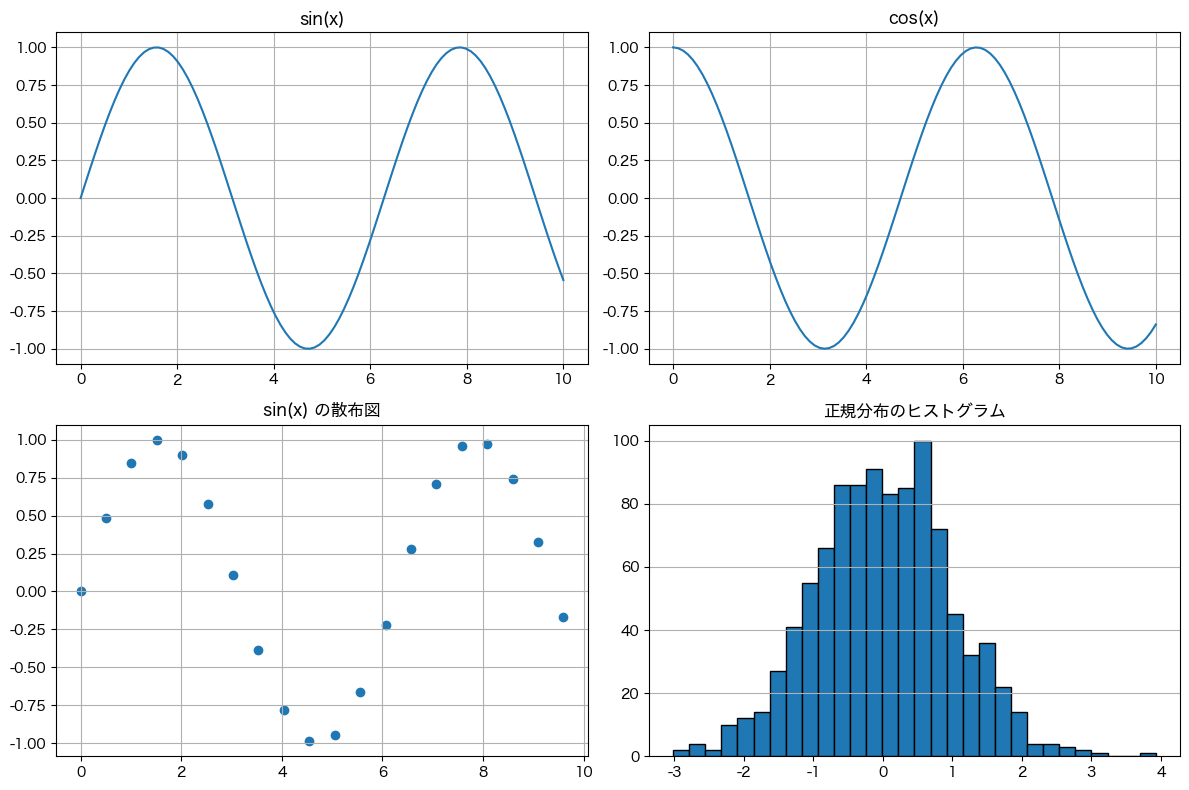

In [56]:
# subplotsを使用した方法（推奨）
x = np.linspace(0, 10, 100)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(x, np.sin(x))
axes[0, 0].set_title('sin(x)')
axes[0, 0].grid(True)

axes[0, 1].plot(x, np.cos(x))
axes[0, 1].set_title('cos(x)')
axes[0, 1].grid(True)

axes[1, 0].scatter(x[::5], np.sin(x[::5]))
axes[1, 0].set_title('sin(x) の散布図')
axes[1, 0].grid(True)

axes[1, 1].hist(np.random.normal(0, 1, 1000), bins=30, edgecolor='black')
axes[1, 1].set_title('正規分布のヒストグラム')
axes[1, 1].grid(True, axis='y')

plt.tight_layout()
plt.show()


---

## 軸の設定とラベル

軸の範囲、目盛り、ラベルを設定することで、より見やすいグラフを作成できます。


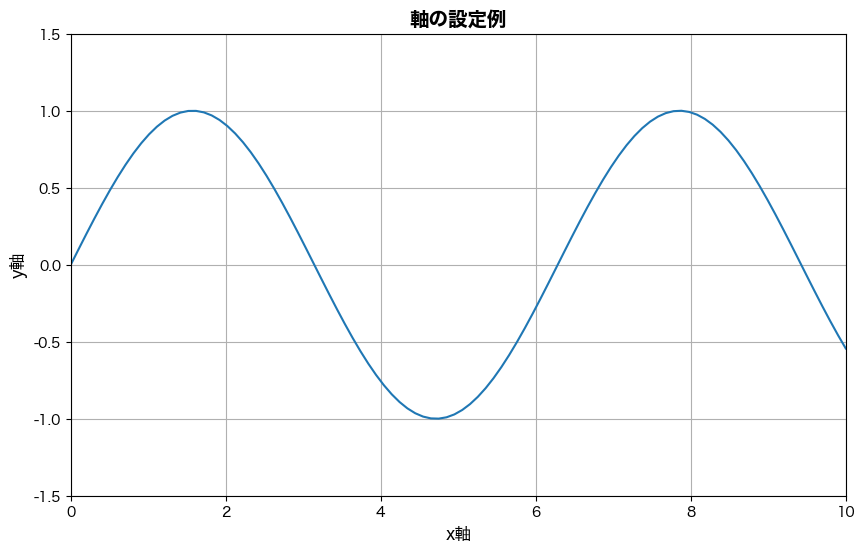

In [57]:
# 軸の範囲と目盛りの設定
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x軸', fontsize=12)
plt.ylabel('y軸', fontsize=12)
plt.title('軸の設定例', fontsize=14, fontweight='bold')
plt.xlim(0, 10)  # x軸の範囲
plt.ylim(-1.5, 1.5)  # y軸の範囲
plt.xticks(np.arange(0, 11, 2))  # x軸の目盛り
plt.yticks(np.arange(-1.5, 2, 0.5))  # y軸の目盛り
plt.grid(True)
plt.show()


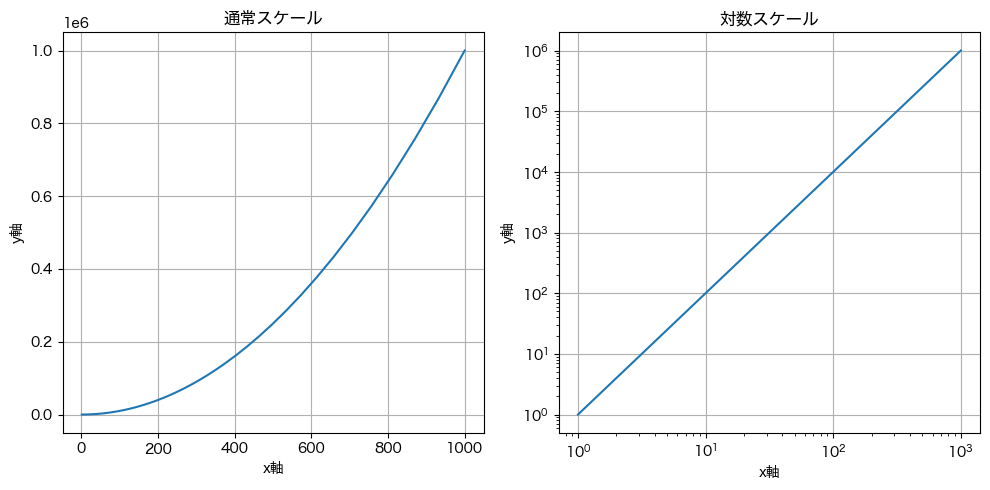

In [58]:
# 対数スケールの使用
x = np.logspace(0, 3, 100)  # 10^0 から 10^3 まで
y = x ** 2

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('通常スケール')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('対数スケール')
plt.xscale('log')  # x軸を対数スケールに
plt.yscale('log')  # y軸を対数スケールに
plt.grid(True)

plt.tight_layout()
plt.show()


---

## 凡例の追加

複数のデータ系列を表示する際、凡例は重要です。


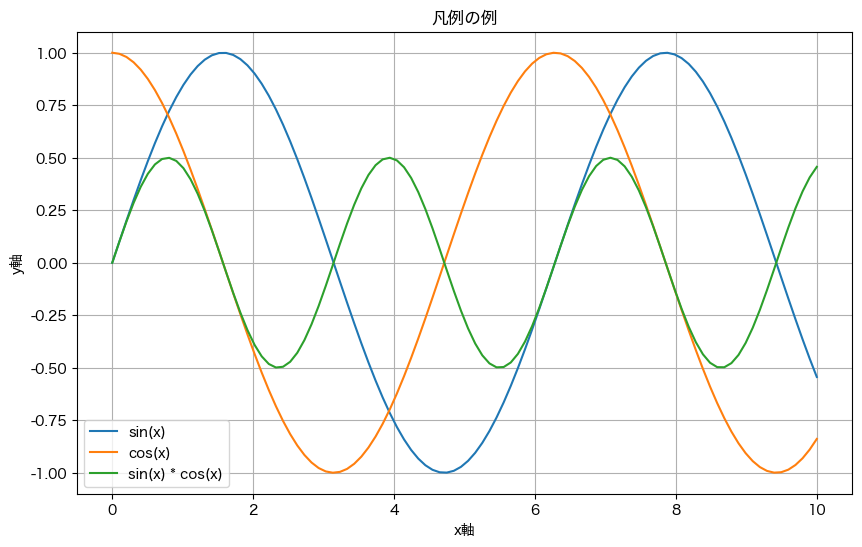

In [59]:
# 凡例の基本的な使い方
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.plot(x, np.sin(x) * np.cos(x), label='sin(x) * cos(x)')
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('凡例の例')
plt.legend()  # 凡例を表示
plt.grid(True)
plt.show()


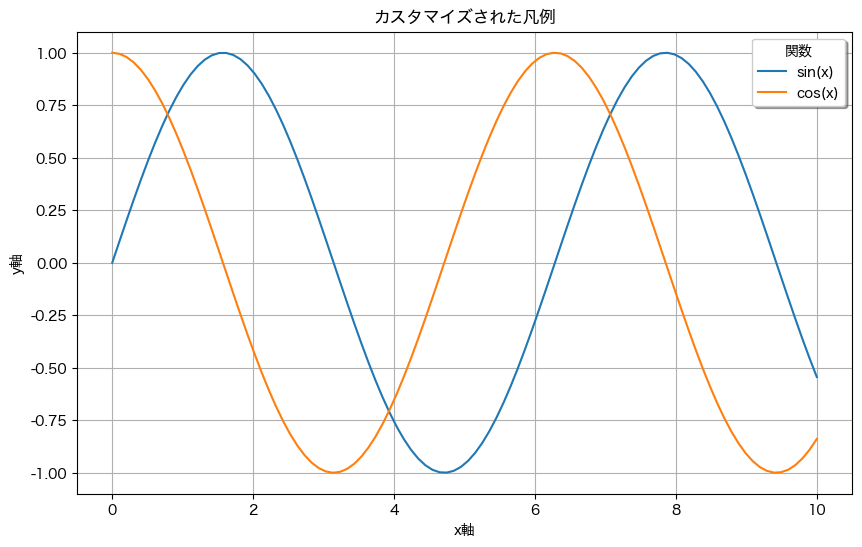

In [60]:
# 凡例の位置とスタイルのカスタマイズ
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.title('カスタマイズされた凡例')
plt.legend(loc='upper right', frameon=True, shadow=True,
           fancybox=True, fontsize=10, title='関数')
plt.grid(True)
plt.show()
